In [28]:
import subprocess
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)

topks = [2, 4, 6, 8, 10]
ppr_normalization = ['row', 'cosine_similarity']
data_file = ['data/cora_ml.npz', 'data/ms_academic.npz', 'data/pubmed.npz']
n_trials = 5

results_df = pd.DataFrame(columns=['topk', 'ppr_normalization', 'data_file', 'Accuracy'])

# Function to run the experiment and capture output
def run_experiment(topk, ppr_norm, dataset):
    print(f"Running experiment with topk={topk}, ppr_normalization={ppr_norm}, data_file={dataset}")
    
    command = [
        "python", "main.py",
        f"--topk={topk}",
        f"--ppr_normalization={ppr_norm}",
        f"--data_file={dataset}"
    ]
    
    result = subprocess.run(command, capture_output=True, text=True, encoding='utf-8')
    
    output = result.stdout
    accuracy = None
    for line in output.splitlines()[-10:]:
        if "Testing accuracy" in line:
            try:
                accuracy = float(line.split(":")[1].strip())
            except ValueError:
                accuracy = None
            break
    
    return accuracy

for topk in topks:
    for ppr_norm in ppr_normalization:
        for dataset in data_file:
            accuracies = []
            for trial in range(n_trials):
                print(f"Trial {trial + 1}/{n_trials}")
                accuracy = run_experiment(topk, ppr_norm, dataset)
                if accuracy is not None:
                    accuracies.append(accuracy)
            
            if accuracies:
                avg_accuracy = np.mean(accuracies)
                std_accuracy = np.std(accuracies)
                # Append the average result to the DataFrame
                results_df = results_df.append({
                    'topk': topk,
                    'ppr_normalization': ppr_norm,
                    'data_file': dataset,
                    'Accuracy': avg_accuracy,
                    'Std': std_accuracy
                }, ignore_index=True)
                print(f"Average accuracy: {avg_accuracy:.4f} ± {std_accuracy:.4f}")
            else:
                print(f"Failed to obtain accuracy for topk={topk}, ppr_normalization={ppr_norm}, data_file={dataset}")

results_df.head()

results_df.to_csv("ppr_experiment_results_with_trials.csv", index=False)


Trial 1/5
Running experiment with topk=2, ppr_normalization=row, data_file=data/cora_ml.npz
Trial 2/5
Running experiment with topk=2, ppr_normalization=row, data_file=data/cora_ml.npz
Trial 3/5
Running experiment with topk=2, ppr_normalization=row, data_file=data/cora_ml.npz
Trial 4/5
Running experiment with topk=2, ppr_normalization=row, data_file=data/cora_ml.npz
Trial 5/5
Running experiment with topk=2, ppr_normalization=row, data_file=data/cora_ml.npz
Average accuracy: 0.7300 ± 0.0272
Trial 1/5
Running experiment with topk=2, ppr_normalization=row, data_file=data/ms_academic.npz
Trial 2/5
Running experiment with topk=2, ppr_normalization=row, data_file=data/ms_academic.npz
Trial 3/5
Running experiment with topk=2, ppr_normalization=row, data_file=data/ms_academic.npz
Trial 4/5
Running experiment with topk=2, ppr_normalization=row, data_file=data/ms_academic.npz
Trial 5/5
Running experiment with topk=2, ppr_normalization=row, data_file=data/ms_academic.npz
Average accuracy: 0.9434 ±

#### Testing with 10 iterations to calculated the final personalised pagerank vector for cosine similarity

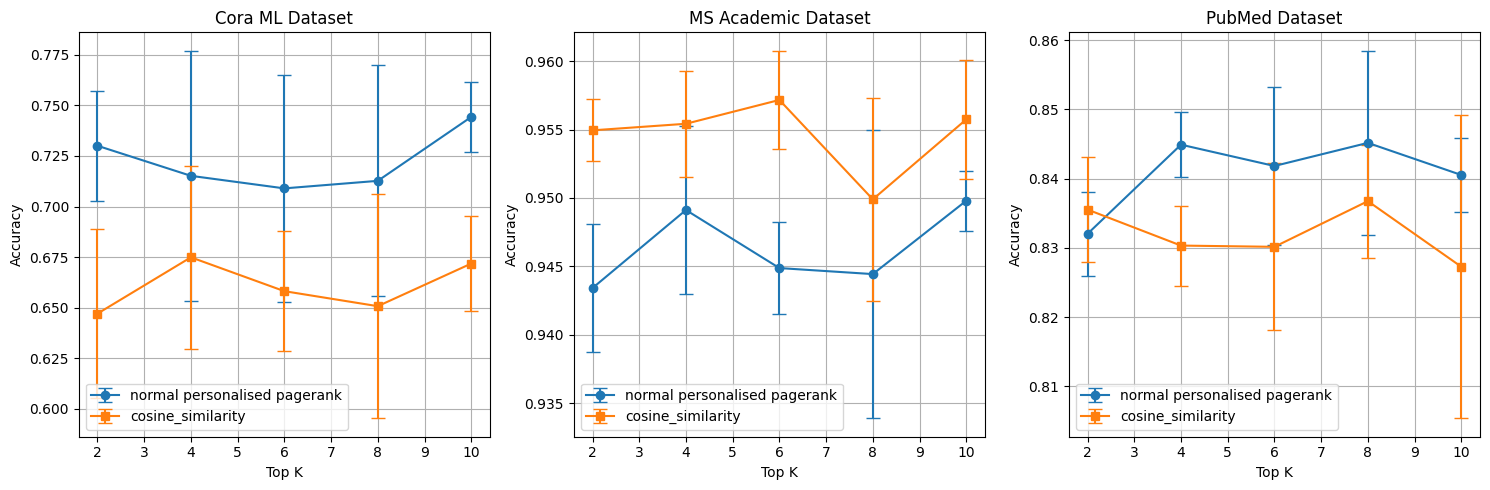

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

datasets = [('cora_ml', 'Cora ML'), ('ms_academic', 'MS Academic'), ('pubmed', 'PubMed')]
axes = [ax1, ax2, ax3]

for (dataset_name, title), ax in zip(datasets, axes):
    dataset_data = results_df[results_df['data_file'] == f'data/{dataset_name}.npz']
    
    for norm in ppr_normalization:
        norm_data = dataset_data[dataset_data['ppr_normalization'] == norm]
        marker = 'o-' if norm == 'row' else 's-'
        ax.errorbar(norm_data['topk'], norm_data['Accuracy'], yerr=norm_data['Std'], 
                   fmt=marker, capsize=5, 
                   label=norm if not norm == 'row' else 'normal personalised pagerank')
    
    ax.set_title(f'{title} Dataset')
    ax.set_xlabel('Top K')
    ax.set_ylabel('Accuracy')
    ax.legend()
    ax.grid(True)

plt.tight_layout()

In [31]:
results2_df = pd.DataFrame(columns=['topk', 'ppr_normalization', 'data_file', 'Accuracy'])

for topk in topks:
    for ppr_norm in ppr_normalization:
        for dataset in data_file:
            accuracies = []
            for trial in range(n_trials):
                print(f"Trial {trial + 1}/{n_trials}")
                accuracy = run_experiment(topk, ppr_norm, dataset)
                if accuracy is not None:
                    accuracies.append(accuracy)
            
            if accuracies:
                avg_accuracy = np.mean(accuracies)
                std_accuracy = np.std(accuracies)
                results2_df = results2_df.append({
                    'topk': topk,
                    'ppr_normalization': ppr_norm,
                    'data_file': dataset,
                    'Accuracy': avg_accuracy,
                    'Std': std_accuracy
                }, ignore_index=True)
                print(f"Average accuracy: {avg_accuracy:.4f} ± {std_accuracy:.4f}")
            else:
                print(f"Failed to obtain accuracy for topk={topk}, ppr_normalization={ppr_norm}, data_file={dataset}")

results2_df.head()

results2_df.to_csv("ppr_experiment_results_with_trials_2.csv", index=False)


Trial 1/5
Running experiment with topk=2, ppr_normalization=row, data_file=data/cora_ml.npz
Trial 2/5
Running experiment with topk=2, ppr_normalization=row, data_file=data/cora_ml.npz
Trial 3/5
Running experiment with topk=2, ppr_normalization=row, data_file=data/cora_ml.npz
Trial 4/5
Running experiment with topk=2, ppr_normalization=row, data_file=data/cora_ml.npz
Trial 5/5
Running experiment with topk=2, ppr_normalization=row, data_file=data/cora_ml.npz
Average accuracy: 0.6929 ± 0.0555
Trial 1/5
Running experiment with topk=2, ppr_normalization=row, data_file=data/ms_academic.npz
Trial 2/5
Running experiment with topk=2, ppr_normalization=row, data_file=data/ms_academic.npz
Trial 3/5
Running experiment with topk=2, ppr_normalization=row, data_file=data/ms_academic.npz
Trial 4/5
Running experiment with topk=2, ppr_normalization=row, data_file=data/ms_academic.npz
Trial 5/5
Running experiment with topk=2, ppr_normalization=row, data_file=data/ms_academic.npz
Average accuracy: 0.9466 ±

#### Testing with 20 iterations to calculate pagerank vector for cosine similarity


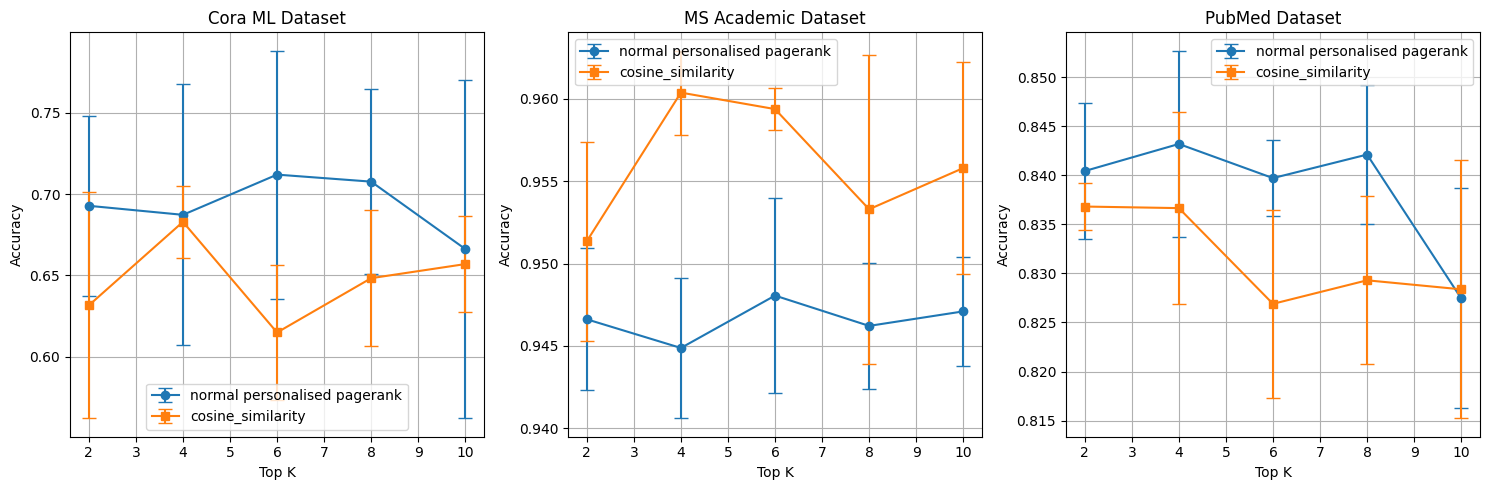

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

datasets = [('cora_ml', 'Cora ML'), ('ms_academic', 'MS Academic'), ('pubmed', 'PubMed')]
axes = [ax1, ax2, ax3]

for (dataset_name, title), ax in zip(datasets, axes):
    dataset_data = results2_df[results2_df['data_file'] == f'data/{dataset_name}.npz']
    
    for norm in ppr_normalization:
        norm_data = dataset_data[dataset_data['ppr_normalization'] == norm]
        marker = 'o-' if norm == 'row' else 's-'
        ax.errorbar(norm_data['topk'], norm_data['Accuracy'], yerr=norm_data['Std'], 
                   fmt=marker, capsize=5, 
                   label=norm if not norm == 'row' else 'normal personalised pagerank')
    
    ax.set_title(f'{title} Dataset')
    ax.set_xlabel('Top K')
    ax.set_ylabel('Accuracy')
    ax.legend()
    ax.grid(True)

plt.tight_layout()